Data exploration

Setup

In [1]:
from pathlib import Path
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torchvision.transforms import v2

from plotting import setup_high_quality_mpl_params


def view_image(file_path:str):
    file_path = Path(file_path)
    assert file_path.is_file()
    image = Image.open(file_path)
    display(image)


setup_high_quality_mpl_params()

Load data

In [2]:
df_train = pd.read_csv("train_catalog.csv")
df_test = pd.read_csv("test_catalog.csv")

Class distribution

Text(0.5, 0, 'class id')

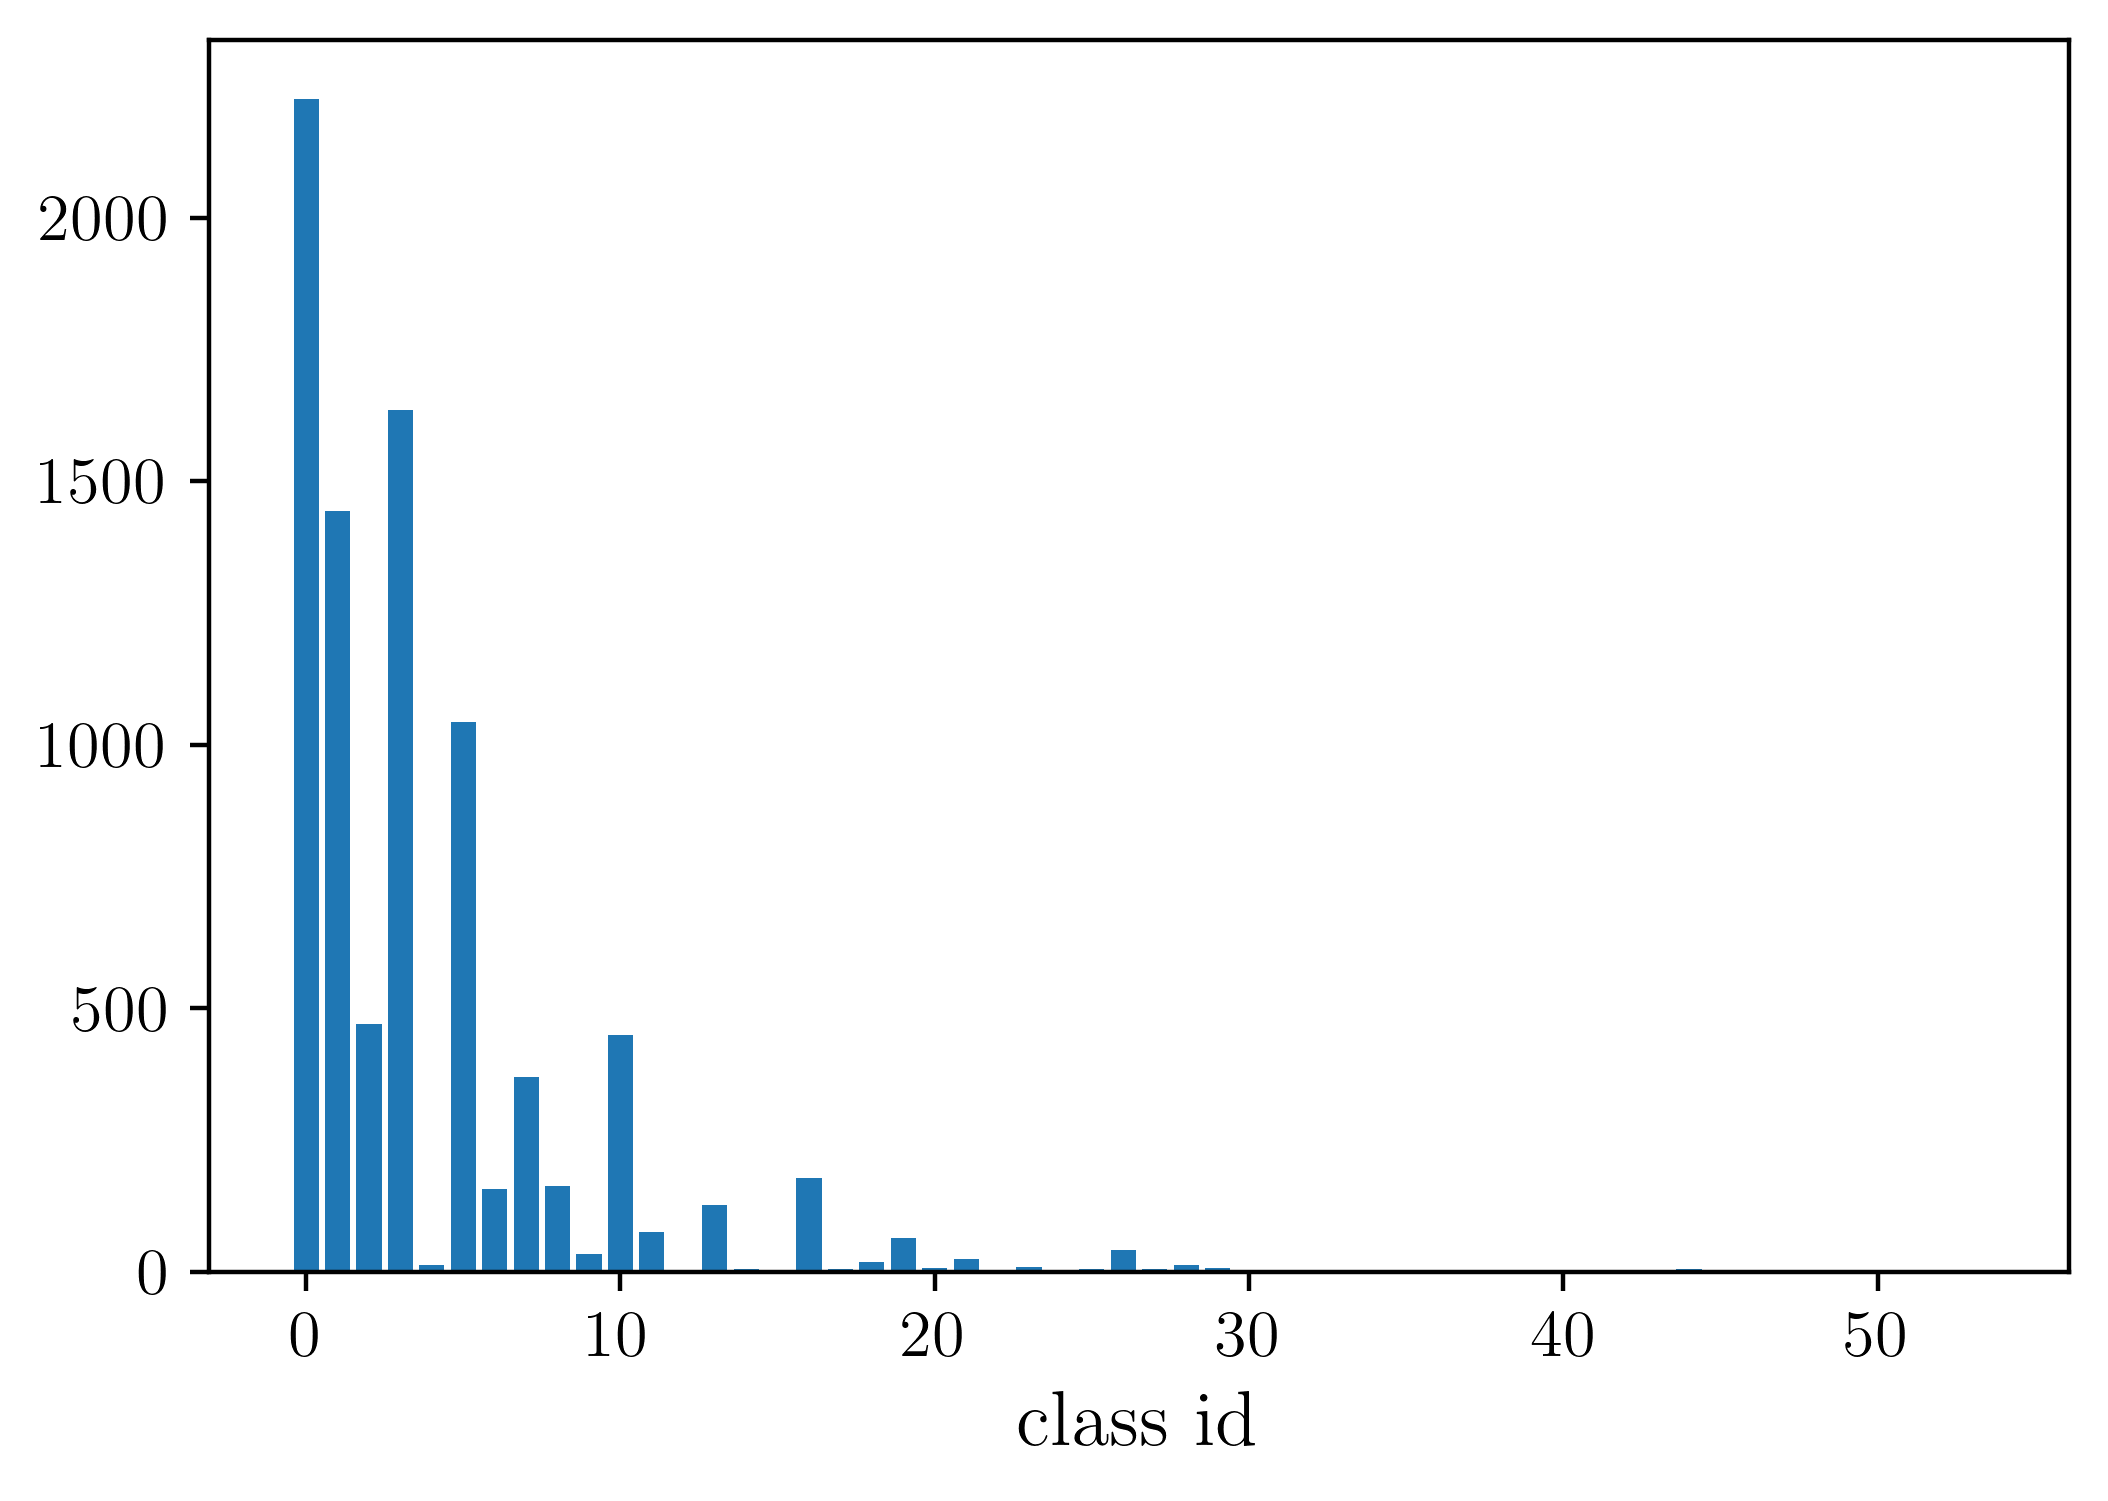

In [3]:
class_counts = df_train["label"].value_counts().sort_index()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("class id")

View some Pokemon

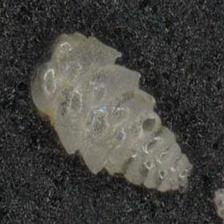

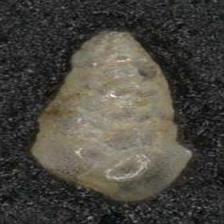

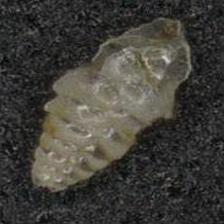

In [4]:
label = 1
num_to_view = 3

for relative_index in range(num_to_view):
    try:
        file_path = f"train/train/{df_train[df_train["label"]==label].iloc[relative_index]["filename"]}"
        view_image(file_path)
    except IndexError:
        pass    

Try augmentations

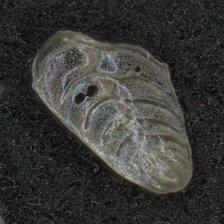

In [5]:
original_image = Image.open("train/train/MV1012-BC-83_obj01986.jpg")
original_image

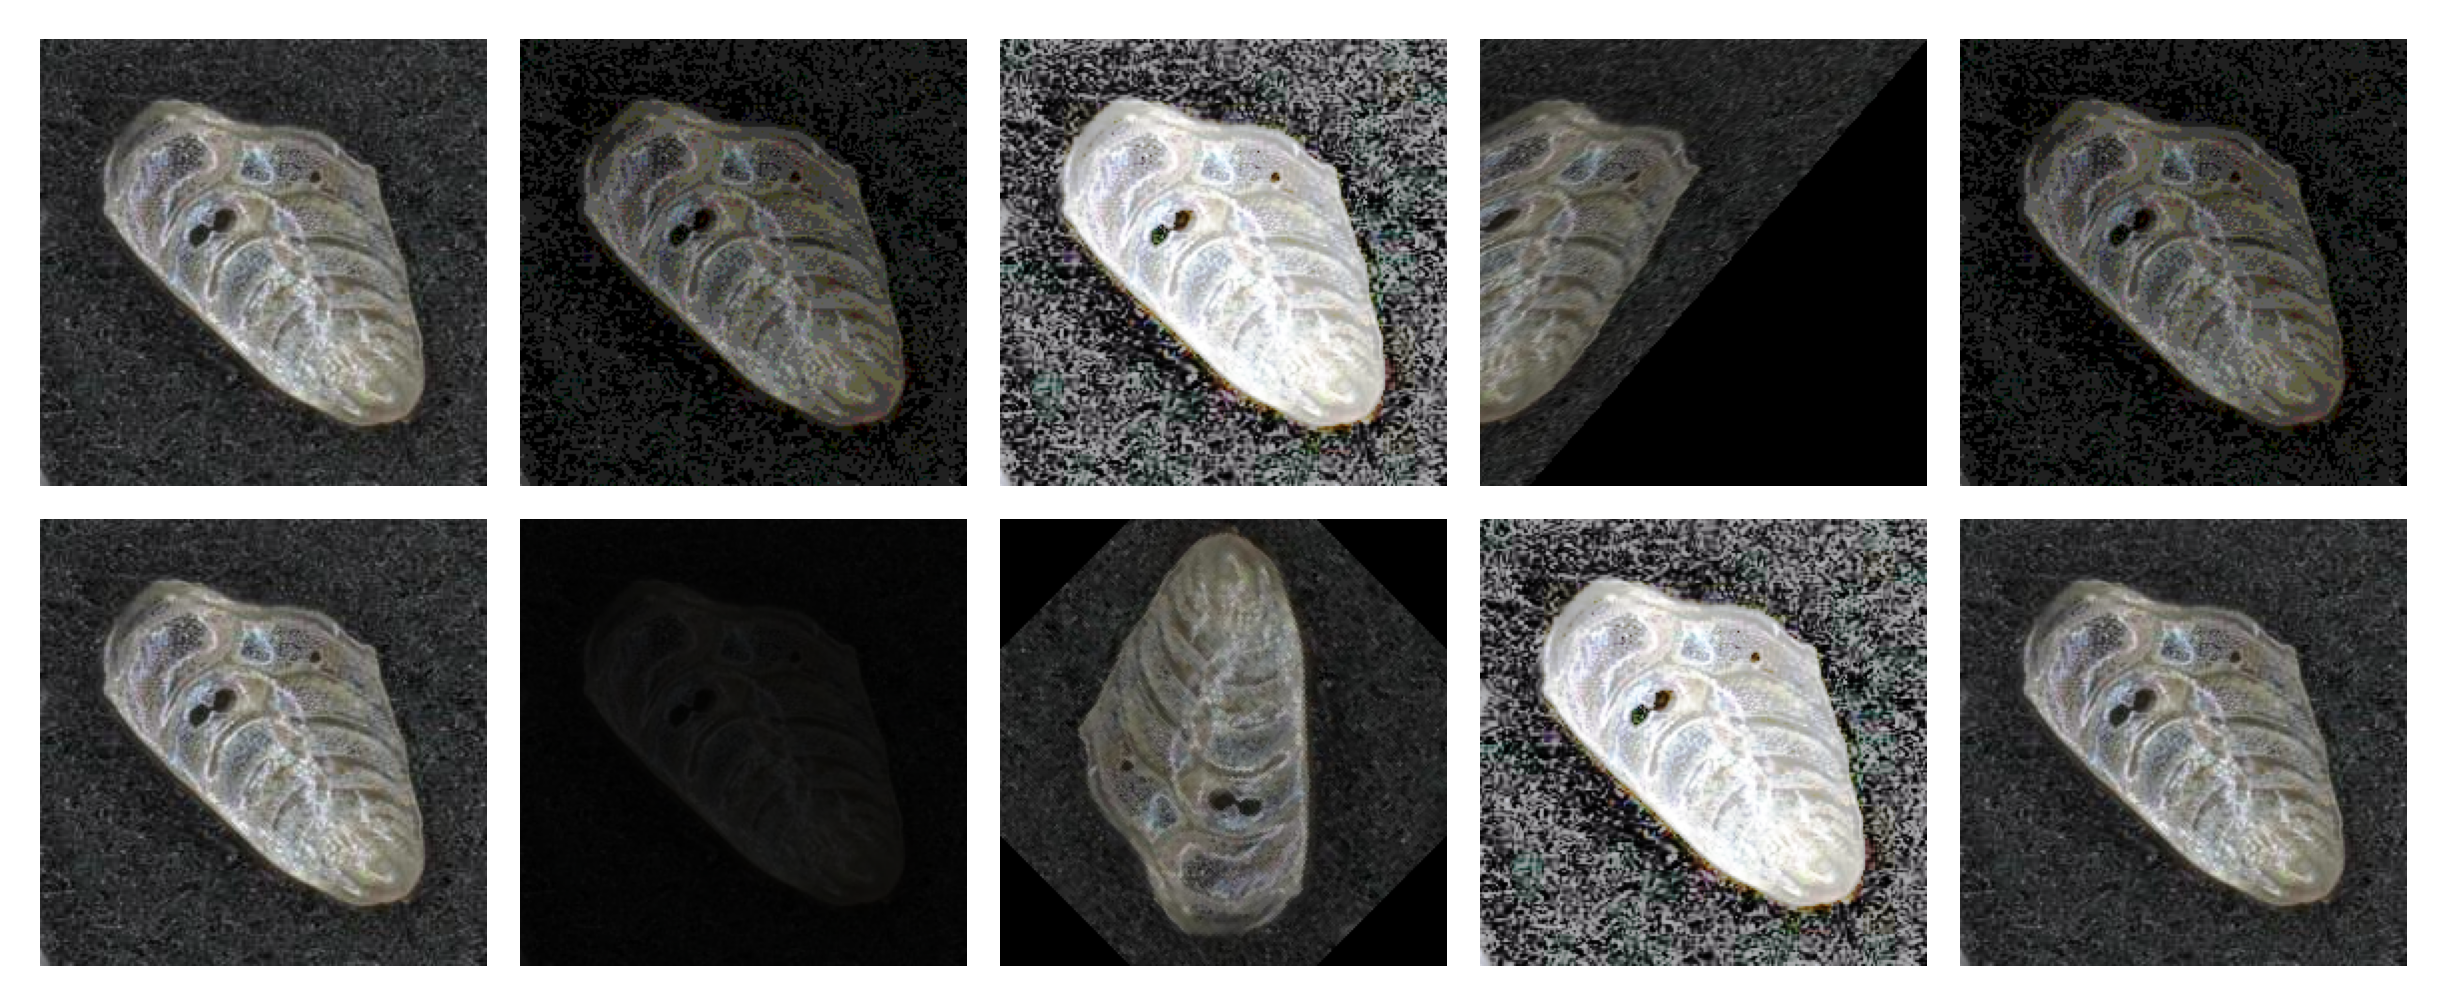

In [6]:
aug = v2.TrivialAugmentWide()

fig, ax = plt.subplots(2,5, layout="compressed", sharex="all", sharey="all")

for row in range(2):
    for col in range(5):
        aug_img = aug(original_image)
        ax[row, col].set_axis_off()
        ax[row, col].imshow(aug_img, aspect="equal")